### Explore Phoenix Vendor Payments from 2014 - 2018

In [182]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [105]:
files = glob.glob('data/cleaned_data/*.csv')

payments = pd.concat([pd.read_csv(f, dtype={'commitmt_item_name': 'str', 'dept._descrptn': 'str', 'vendor_name': 'str'}) \
                      for f in files], sort=True)

In [106]:
payments.shape

(2215460, 5)

In [107]:
payments.dtypes

check/payment_date     object
commitmt_item_name     object
dept._descrptn         object
invoice_net_amt       float64
vendor_name            object
dtype: object

In [109]:
payments.set_index('vendor_name', inplace=True)

In [114]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt
vendor_name,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79


#### Change columns to appropriate data types

In [112]:
# change Check/Payment Date to datetime format
payments['check/payment_date'] = pd.to_datetime(payments['check/payment_date'])

In [113]:
payments.dtypes

check/payment_date    datetime64[ns]
commitmt_item_name            object
dept._descrptn                object
invoice_net_amt              float64
dtype: object

### How do payments track year over year, month over month?

In [159]:
# combine year and month in same column to be able to graph year + month together
payments['year_month'] = payments['check/payment_date'].apply(lambda x: str(x.year) + str(x.month).zfill(2))

In [173]:
# designate year and month in separate columns to be able to graph these separately
payments['year'] = payments['check/payment_date'].apply(lambda x: x.year)
payments['month'] = payments['check/payment_date'].apply(lambda x: x.month)

In [174]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,year_month,year,month
vendor_name,,,,,,,
3M COMPANY,2014-01-02,Inventories,Street Transportation,-34.78,201401,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-69.55,201401,2014,1
3M COMPANY,2014-01-02,Inventories,Street Transportation,-77.00,201401,2014,1
AGS SAFETY & SUPPLY,2014-01-02,Inventories,Public Works,0.01,201401,2014,1
AMERICAN EUROCOPTER CORPORATION,2014-01-02,Inventories,Police,-0.79,201401,2014,1


In [179]:
payments.groupby('year')['invoice_net_amt'].sum().reset_index().style.format({'invoice_net_amt': '${0:,.0f}'})

,year,invoice_net_amt
0,2014,"$1,953,571,475"
1,2015,"$1,878,188,711"
2,2016,"$2,188,409,617"
3,2017,"$2,192,127,991"
4,2018,"$2,619,813,268"


In [218]:
payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().head()

,year,month,invoice_net_amt
0,2014,1,1.417693e+08
1,2014,2,1.271078e+08
2,2014,3,1.125259e+08
3,2014,4,1.271444e+08
4,2014,5,1.357784e+08


In [225]:
payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().head()

,year,invoice_net_amt
0,2014,1.953571e+09
1,2015,1.878189e+09
2,2016,2.188410e+09
3,2017,2.192128e+09
4,2018,2.619813e+09


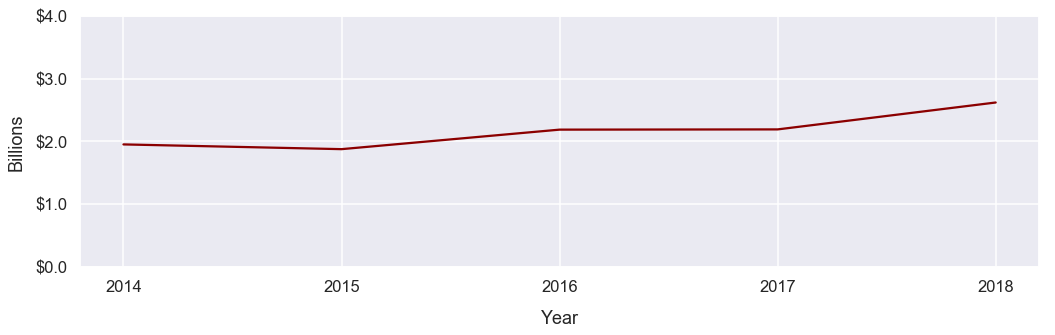

In [286]:
sns.set(rc={'figure.figsize':(15,5)})

sns.set_context('talk')
plt.ylim(0,4000000000)
plt.tight_layout()

ax = sns.lineplot(x=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().iloc[:,0], 
                  y=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index().iloc[:,1], 
                  data=payments.groupby(['year'])['invoice_net_amt'].sum().reset_index(), 
                 color='darkred')

# plt.title("Year Over Year Payments")
plt.xlabel("Year", labelpad=15)
plt.ylabel("Billions", labelpad=10)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.1f' % (x*1e-9)))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.tight_layout()

plt.savefig("visualizations/year_over_year.png")

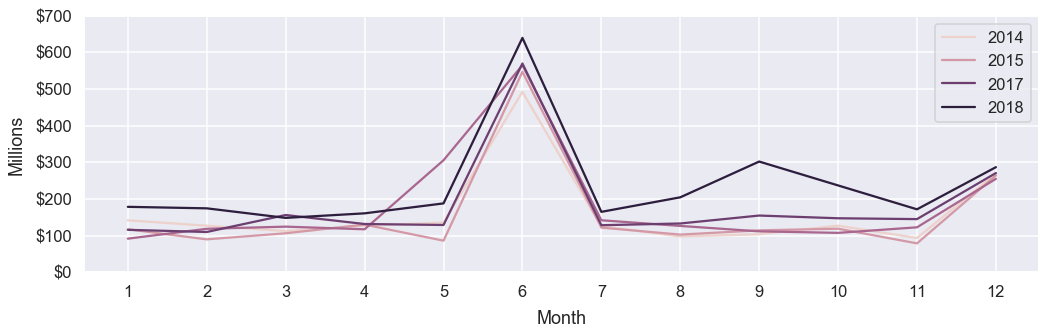

In [287]:
sns.set(rc={'figure.figsize':(15,5)})
plt.tight_layout()
sns.set_context('talk')
# sns.set_context('paper')
# sns.set_context('poster')

plt.ylim(0,700000000)

ax = sns.lineplot(x=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,1], \
                  y=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,2], \
                  hue=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index().iloc[:,0], \
                  data=payments.groupby(['year','month'])['invoice_net_amt'].sum().reset_index())

# plt.title("Payments By Month Of The Year")
plt.xlabel("Month", labelpad=10)
plt.ylabel("Millions", labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plt.tight_layout()

plt.savefig("visualizations/month_over_month.png")

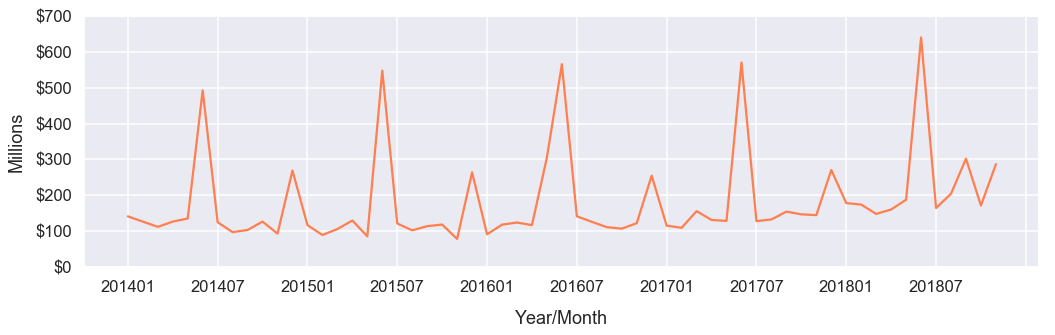

In [285]:
sns.set(rc={'figure.figsize':(15,5)})
plt.tight_layout()
sns.set_context("talk")
# sns.set_context("notebook", font_scale=1.3)

plt.ylim(0,700000000)

ax = sns.lineplot(x=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index().iloc[:,0], \
                  y=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index().iloc[:,1], \
                  data=payments.groupby('year_month')['invoice_net_amt'].sum().reset_index(),
                 color='coral')

# plt.title("Payments By Year/Month",fontsize=20)
plt.xlabel("Year/Month", labelpad=15)
plt.ylabel("Millions",labelpad=10)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '$%1.0f' % (x*1e-6)))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(6))
plt.tight_layout()

plt.savefig("visualizations/payments_by_year_month.png")